In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Reading the Data

In [2]:
df = pd.read_csv('student-por 2.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.describe(include='all').iloc[:, 15:]

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649,649,649,649,649,649,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,581,398,610,334,521,580,498,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


In [4]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Start EDA

In [5]:
college_df = df[df['higher'] == 'yes']
no_college_df = df[df['higher'] == 'no']
college_df.shape
no_college_df.shape

(69, 33)

In [6]:
print(college_df[college_df['age'] > 15].shape)
college_df[college_df['age'] >= 14].shape

(471, 33)


(580, 33)

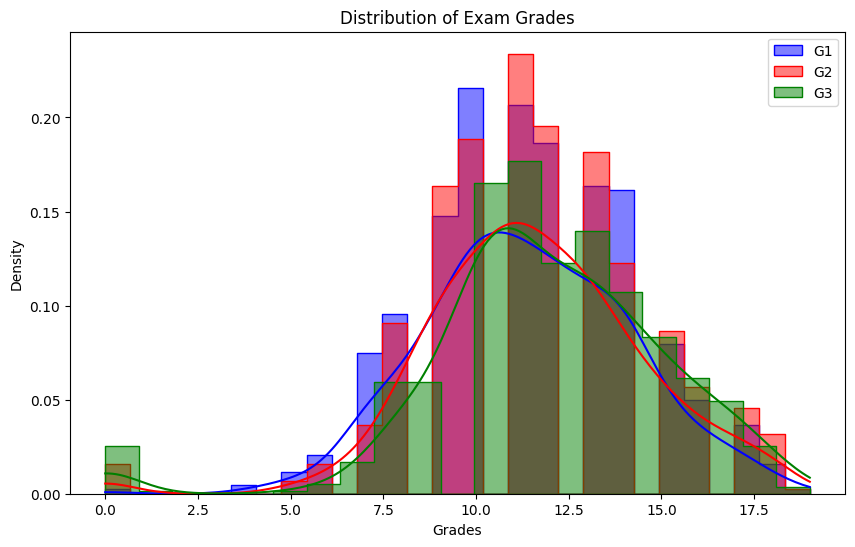

G1 mean 11.399075500770415
G2 mean 11.570107858243452
G3 mean 11.906009244992296


In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='G1', kde=True, element='step', label='G1', color='blue', stat='density')
sns.histplot(data=df, x='G2', kde=True, element='step', label='G2', color='red', stat='density')
sns.histplot(data=df, x='G3', kde=True, element='step', label='G3', color='green', stat='density')
plt.title('Distribution of Exam Grades')
plt.xlabel('Grades')
plt.ylabel('Density')
plt.legend()
plt.show()
print('G1 mean', np.mean(df['G1']))
print('G2 mean', np.mean(df['G2']))
print('G3 mean', np.mean(df['G3']))

In [8]:
print('College Plans G1 mean', np.mean(college_df['G1']))
print('College Plans G2 mean', np.mean(college_df['G2']))
print('College Plans G3 mean', np.mean(college_df['G3']))
print('No College Plans G1 mean', np.mean(no_college_df['G1']))
print('No College Plans G2 mean', np.mean(no_college_df['G2']))
print('No College Plans G3 mean', np.mean(no_college_df['G3']))

College Plans G1 mean 11.729310344827587
College Plans G2 mean 11.903448275862068
College Plans G3 mean 12.275862068965518
No College Plans G1 mean 8.623188405797102
No College Plans G2 mean 8.768115942028986
No College Plans G3 mean 8.797101449275363


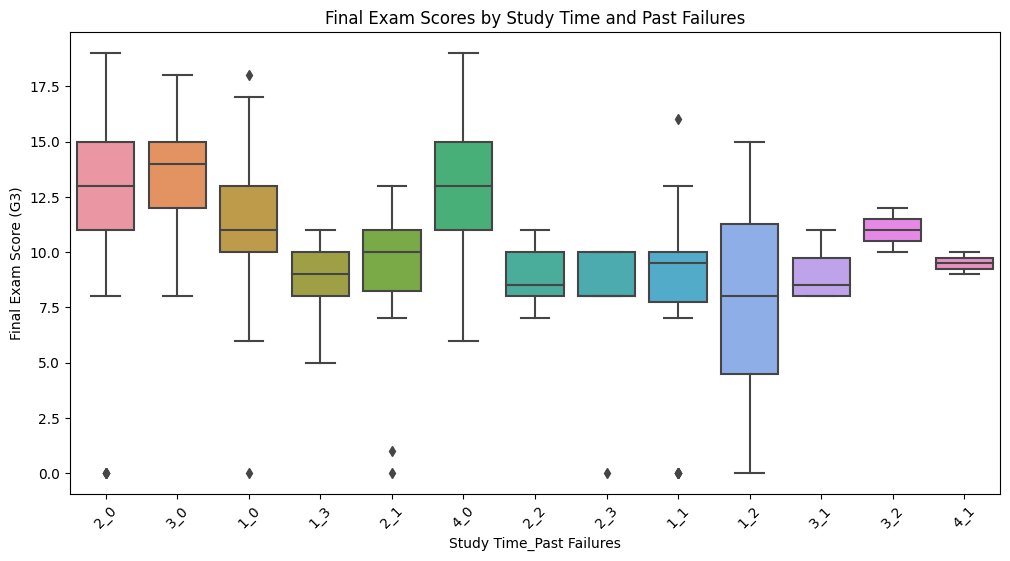

In [9]:
# Creating a new feature for better visualization
df['StudyTime_Failures'] = df['studytime'].astype(str) + '_' + df['failures'].astype(str)

plt.figure(figsize=(12, 6))
sns.boxplot(x='StudyTime_Failures', y='G3', data=df)
plt.title('Final Exam Scores by Study Time and Past Failures')
plt.xticks(rotation=45)
plt.xlabel('Study Time_Past Failures')
plt.ylabel('Final Exam Score (G3)')
plt.show()


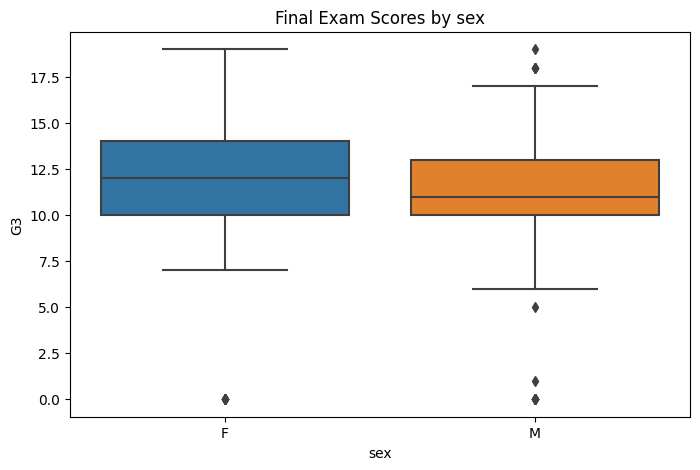

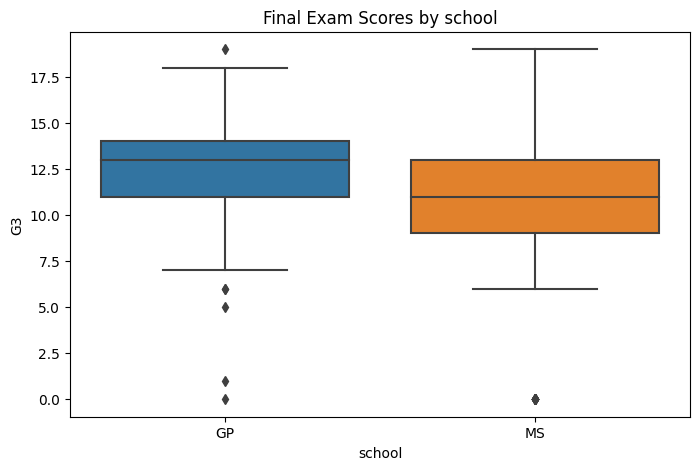

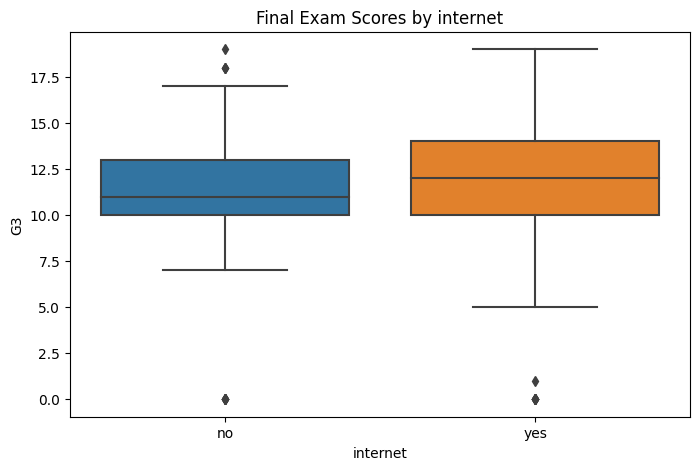

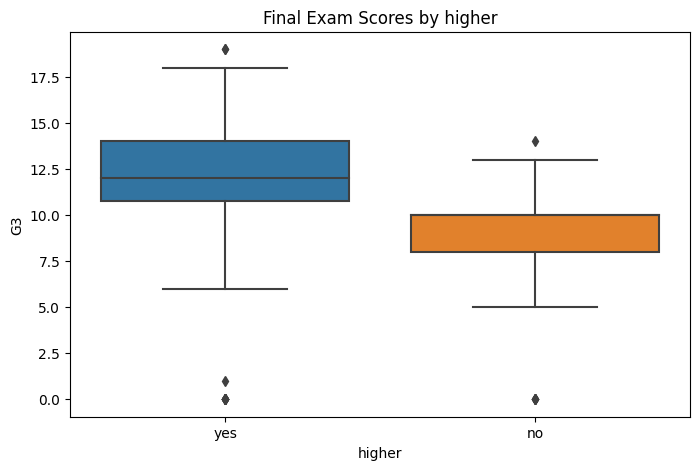

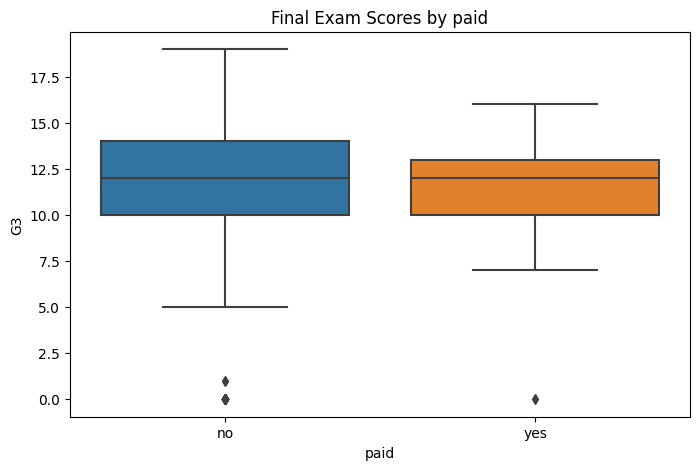

In [10]:
# Categorical variables to explore
categorical_features = ['sex', 'school', 'internet', 'higher', 'paid']

# Box plots for exam scores by categorical variables
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='G3', data=df)
    plt.title(f'Final Exam Scores by {feature}')
    plt.show()


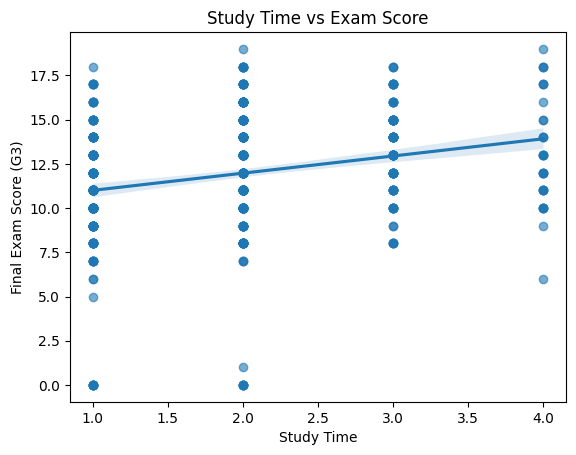

In [11]:
sns.regplot(x='studytime', y='G3', data=df, scatter_kws={'alpha':0.6})
plt.title('Study Time vs Exam Score')
plt.xlabel('Study Time')
plt.ylabel('Final Exam Score (G3)')
plt.show()

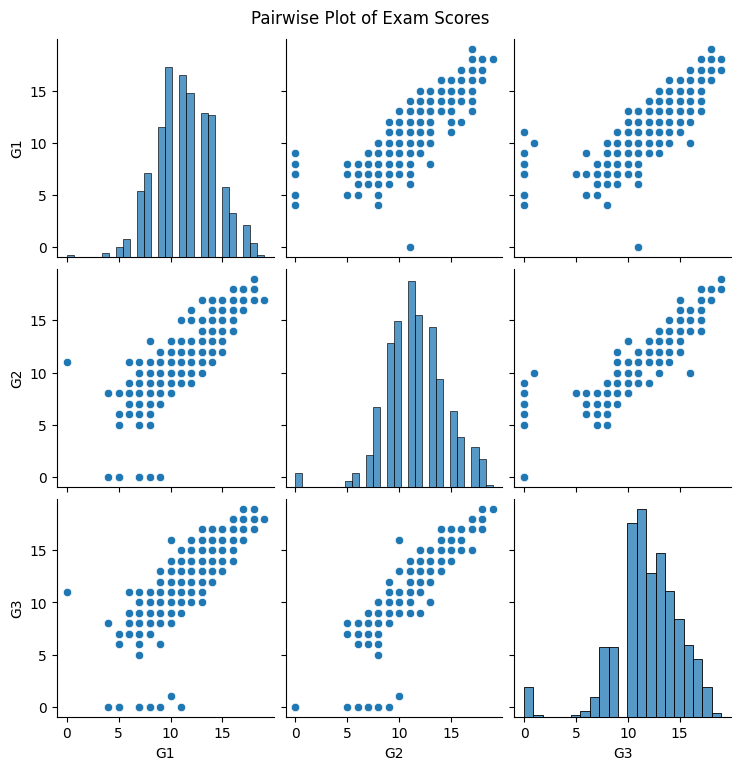

In [12]:
sns.pairplot(df[['G1', 'G2', 'G3']])
plt.suptitle('Pairwise Plot of Exam Scores', y=1.02)
plt.show()

## Counts of different Variables among College Vs no College

In [62]:
smart_df = college_df[(college_df['paid'] == 'yes')]

In [14]:
help_df = college_df[college_df['schoolsup'] == 'yes']
help_df.shape

(66, 33)

In [15]:
print('Number of students without internet: ', df[df['internet'] == 'no'].shape[0])
print('Number of students without family support: ', df[df['famsup'] == 'no'].shape[0])
print('Number of students with poor family relationships: ', df[df['famrel'] <= 2].shape[0])
print('Number of students with poor health: ', df[df['health'] <= 2].shape[0])

Number of students without internet:  151
Number of students without family support:  251
Number of students with poor family relationships:  51
Number of students with poor health:  168


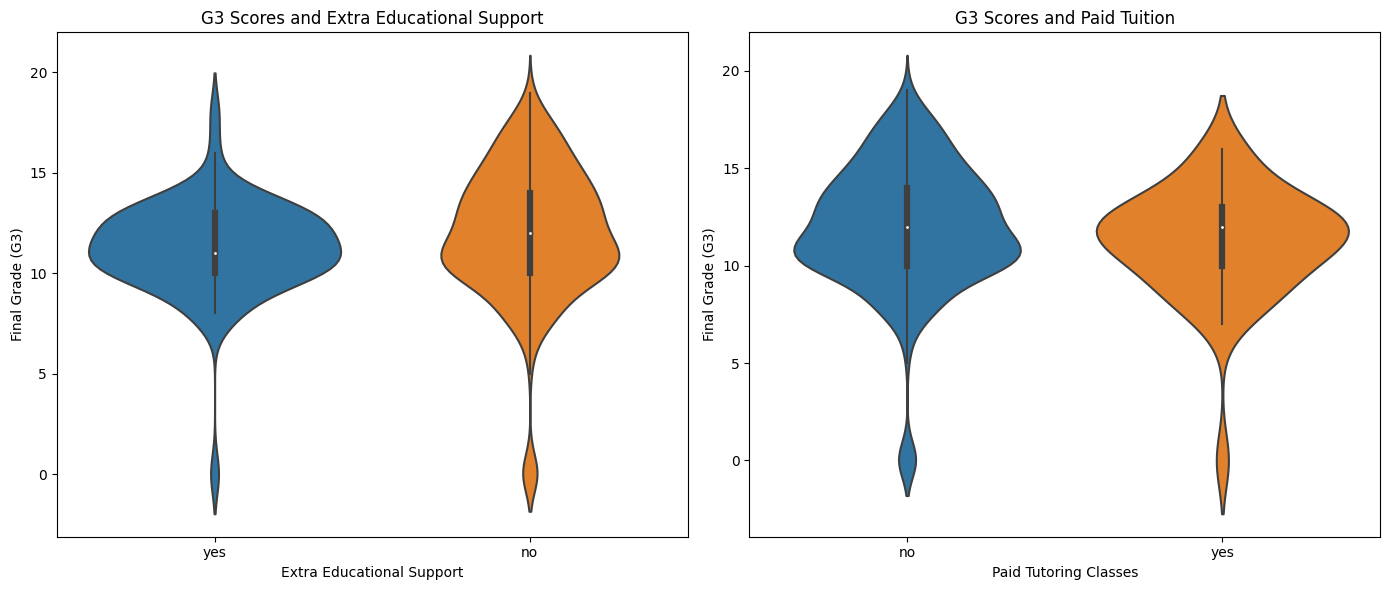

In [16]:
plt.figure(figsize=(14, 6))

# Violin plot for students with extra educational support
plt.subplot(1, 2, 1)
sns.violinplot(x='schoolsup', y='G3', data=df)
plt.title('G3 Scores and Extra Educational Support')
plt.xlabel('Extra Educational Support')
plt.ylabel('Final Grade (G3)')

# Violin plot for students with paid tuition
plt.subplot(1, 2, 2)
sns.violinplot(x='paid', y='G3', data=df)
plt.title('G3 Scores and Paid Tuition')
plt.xlabel('Paid Tutoring Classes')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [17]:
print('Average study time of person going to college:', np.mean(college_df['studytime']))
print('Average study time of person NOT going to college:', np.mean(no_college_df['studytime']))

Average study time of person going to college: 1.9844827586206897
Average study time of person NOT going to college: 1.4782608695652173


In [18]:
import pandas as pd
contingency_table = pd.crosstab(df['activities'], df['higher'])

print(contingency_table)
print('-------------------------------')
print('Break down of reason people joined this school')
print(df['reason'].value_counts())

higher      no  yes
activities         
no          40  294
yes         29  286
-------------------------------
Break down of reason people joined this school
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64


Text(0.5, 1.0, 'Paid Counts (Yes = Paid classes)')

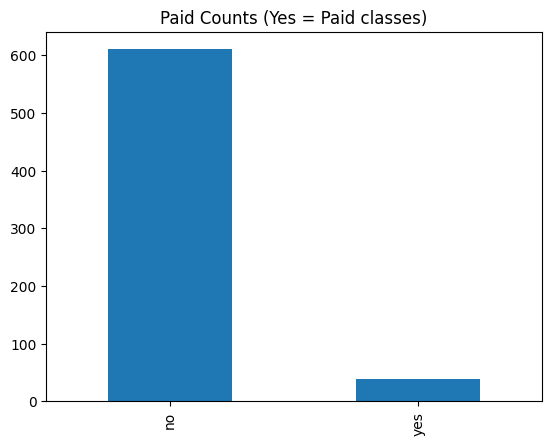

In [19]:
df['paid'].value_counts().plot(kind='bar')
plt.title('Paid Counts (Yes = Paid classes)')

Text(0.5, 1.0, 'Distribution of Family Relationships')

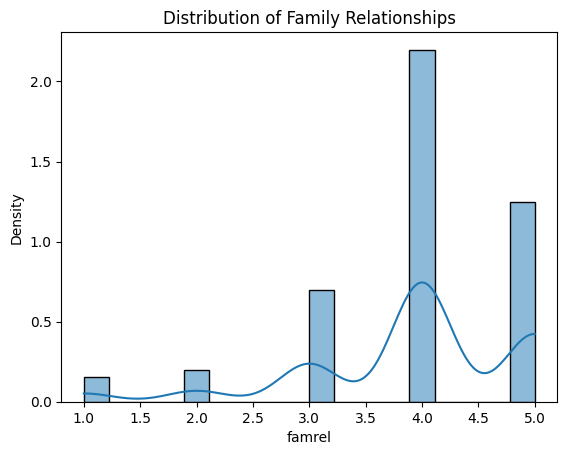

In [20]:
sns.histplot(data=df, x='famrel', kde=True, stat='density')
plt.title('Distribution of Family Relationships')

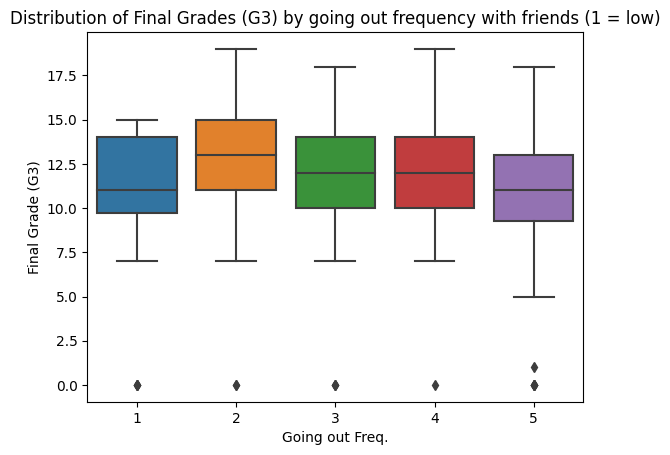

In [21]:
sns.boxplot(x='goout', y='G3', data=df)
plt.title('Distribution of Final Grades (G3) by going out frequency with friends (1 = low)')
plt.xlabel('Going out Freq.')
plt.ylabel('Final Grade (G3)')
plt.show()

## T-Test + Correlation + G3-G1

In [26]:
# Calculate correlation between G3 scores and other variables
df['G3 - G1'] = df['G3'] - df['G1']
correlation_matrix = df.corr()
g_correlation = correlation_matrix['G3 - G1']
g_correlation


/var/folders/z7/y1b2vz_14td931c87v2z7wx80000gn/T/ipykernel_86494/3261292074.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


age           0.073859
Medu          0.033381
Fedu          0.047867
traveltime    0.006726
studytime     0.049875
failures     -0.118581
famrel        0.038854
freetime     -0.075243
goout        -0.043852
Dalc         -0.068972
Walc         -0.078701
health       -0.097525
absences      0.059728
G1           -0.041462
G2            0.325639
G3            0.528354
G3 - G1       1.000000
Name: G3 - G1, dtype: float64

In [31]:
t_stat, p_value = ttest_ind(college_df['G3'], no_college_df['G3'])

# Output the results
print("Mean G3 for students who want to go to college:", college_df['G3'].mean())
print("Mean G3 for students who don't want to go to college:", no_college_df['G3'].mean())
print("T-statistic:", t_stat)
print("P-value:", p_value)

Mean G3 for students who want to go to college: 12.275862068965518
Mean G3 for students who don't want to go to college: 8.797101449275363
T-statistic: 8.957815184466758
P-value: 3.499659592830118e-18


In [40]:
variables_of_interest = ['sex', 'famrel', 'freetime', 'Medu', 'Fedu', 'reason', 'activities']
for variable in variables_of_interest:
    unique_values = df[variable].unique()
    for value in unique_values:
        college_group = df[(df['higher'] == 'yes') & (df[variable] == value)]['G3']
        no_college_group = df[(df['higher'] == 'no') & (df[variable] == value)]['G3']
        t_stat, p_value = ttest_ind(college_group, no_college_group)
        print(f"T-test for {variable}={value}:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("\n")

T-test for sex=F:
T-statistic: 6.771906384247196
P-value: 4.827701210569979e-11


T-test for sex=M:
T-statistic: 5.657913904041904
P-value: 3.981587772206753e-08


T-test for famrel=4:
T-statistic: 5.110711339402693
P-value: 5.576680441660412e-07


T-test for famrel=5:
T-statistic: 5.558709098562075
P-value: 9.798772919462747e-08


T-test for famrel=3:
T-statistic: 3.547330849246066
P-value: 0.0005965693663662245


T-test for famrel=1:
T-statistic: 0.4353792894997863
P-value: 0.6679495163602707


T-test for famrel=2:
T-statistic: 4.6949608754890555
P-value: 6.914125944002318e-05


T-test for freetime=3:
T-statistic: 6.0822848522318935
P-value: 4.435110958708815e-09


T-test for freetime=2:
T-statistic: 2.408481153014227
P-value: 0.017761582177567053


T-test for freetime=4:
T-statistic: 4.201813181387686
P-value: 4.2029846855740915e-05


T-test for freetime=1:
T-statistic: 1.6980870022665173
P-value: 0.09671786956411436


T-test for freetime=5:
T-statistic: 3.4315541948845247
P-value: 

In [46]:
# List of variables you want to analyze
variables_of_interest = ['sex', 'address', 'famsize', 'Pstatus', 'Medu']

# Create a DataFrame with only the variables of interest
X = df[variables_of_interest]

# Target variable
y = df['higher'].map({'yes': '1', 'no': '0'})

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression models for each variable
for variable in variables_of_interest:
    # Create a logistic regression model
    model = LogisticRegression()
    
    # Fit the model
    model.fit(X_train[[col for col in X_train.columns if col.startswith(variable)]], y_train)
    
    # Print the results
    print(f"\nLogistic Regression results for {variable}:\n")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Training Accuracy: {model.score(X_train[[col for col in X_train.columns if col.startswith(variable)]], y_train)}")
    print(f"Testing Accuracy: {model.score(X_test[[col for col in X_test.columns if col.startswith(variable)]], y_test)}")



Logistic Regression results for sex:

Coefficients: [[ 0.16376315 -0.16376322]]
Intercept: [2.08108096]
Training Accuracy: 0.8901734104046243
Testing Accuracy: 0.9076923076923077

Logistic Regression results for address:

Coefficients: [[-0.22206012  0.22205936]]
Intercept: [2.02512832]
Training Accuracy: 0.8901734104046243
Testing Accuracy: 0.9076923076923077

Logistic Regression results for famsize:

Coefficients: [[-0.03866421  0.03870704]]
Intercept: [2.11017545]
Training Accuracy: 0.8901734104046243
Testing Accuracy: 0.9076923076923077

Logistic Regression results for Pstatus:

Coefficients: [[ 0.0437906  -0.04377994]]
Intercept: [2.12663842]
Training Accuracy: 0.8901734104046243
Testing Accuracy: 0.9076923076923077

Logistic Regression results for Medu:

Coefficients: [[0.71152242]]
Intercept: [0.55577733]
Training Accuracy: 0.8901734104046243
Testing Accuracy: 0.9076923076923077


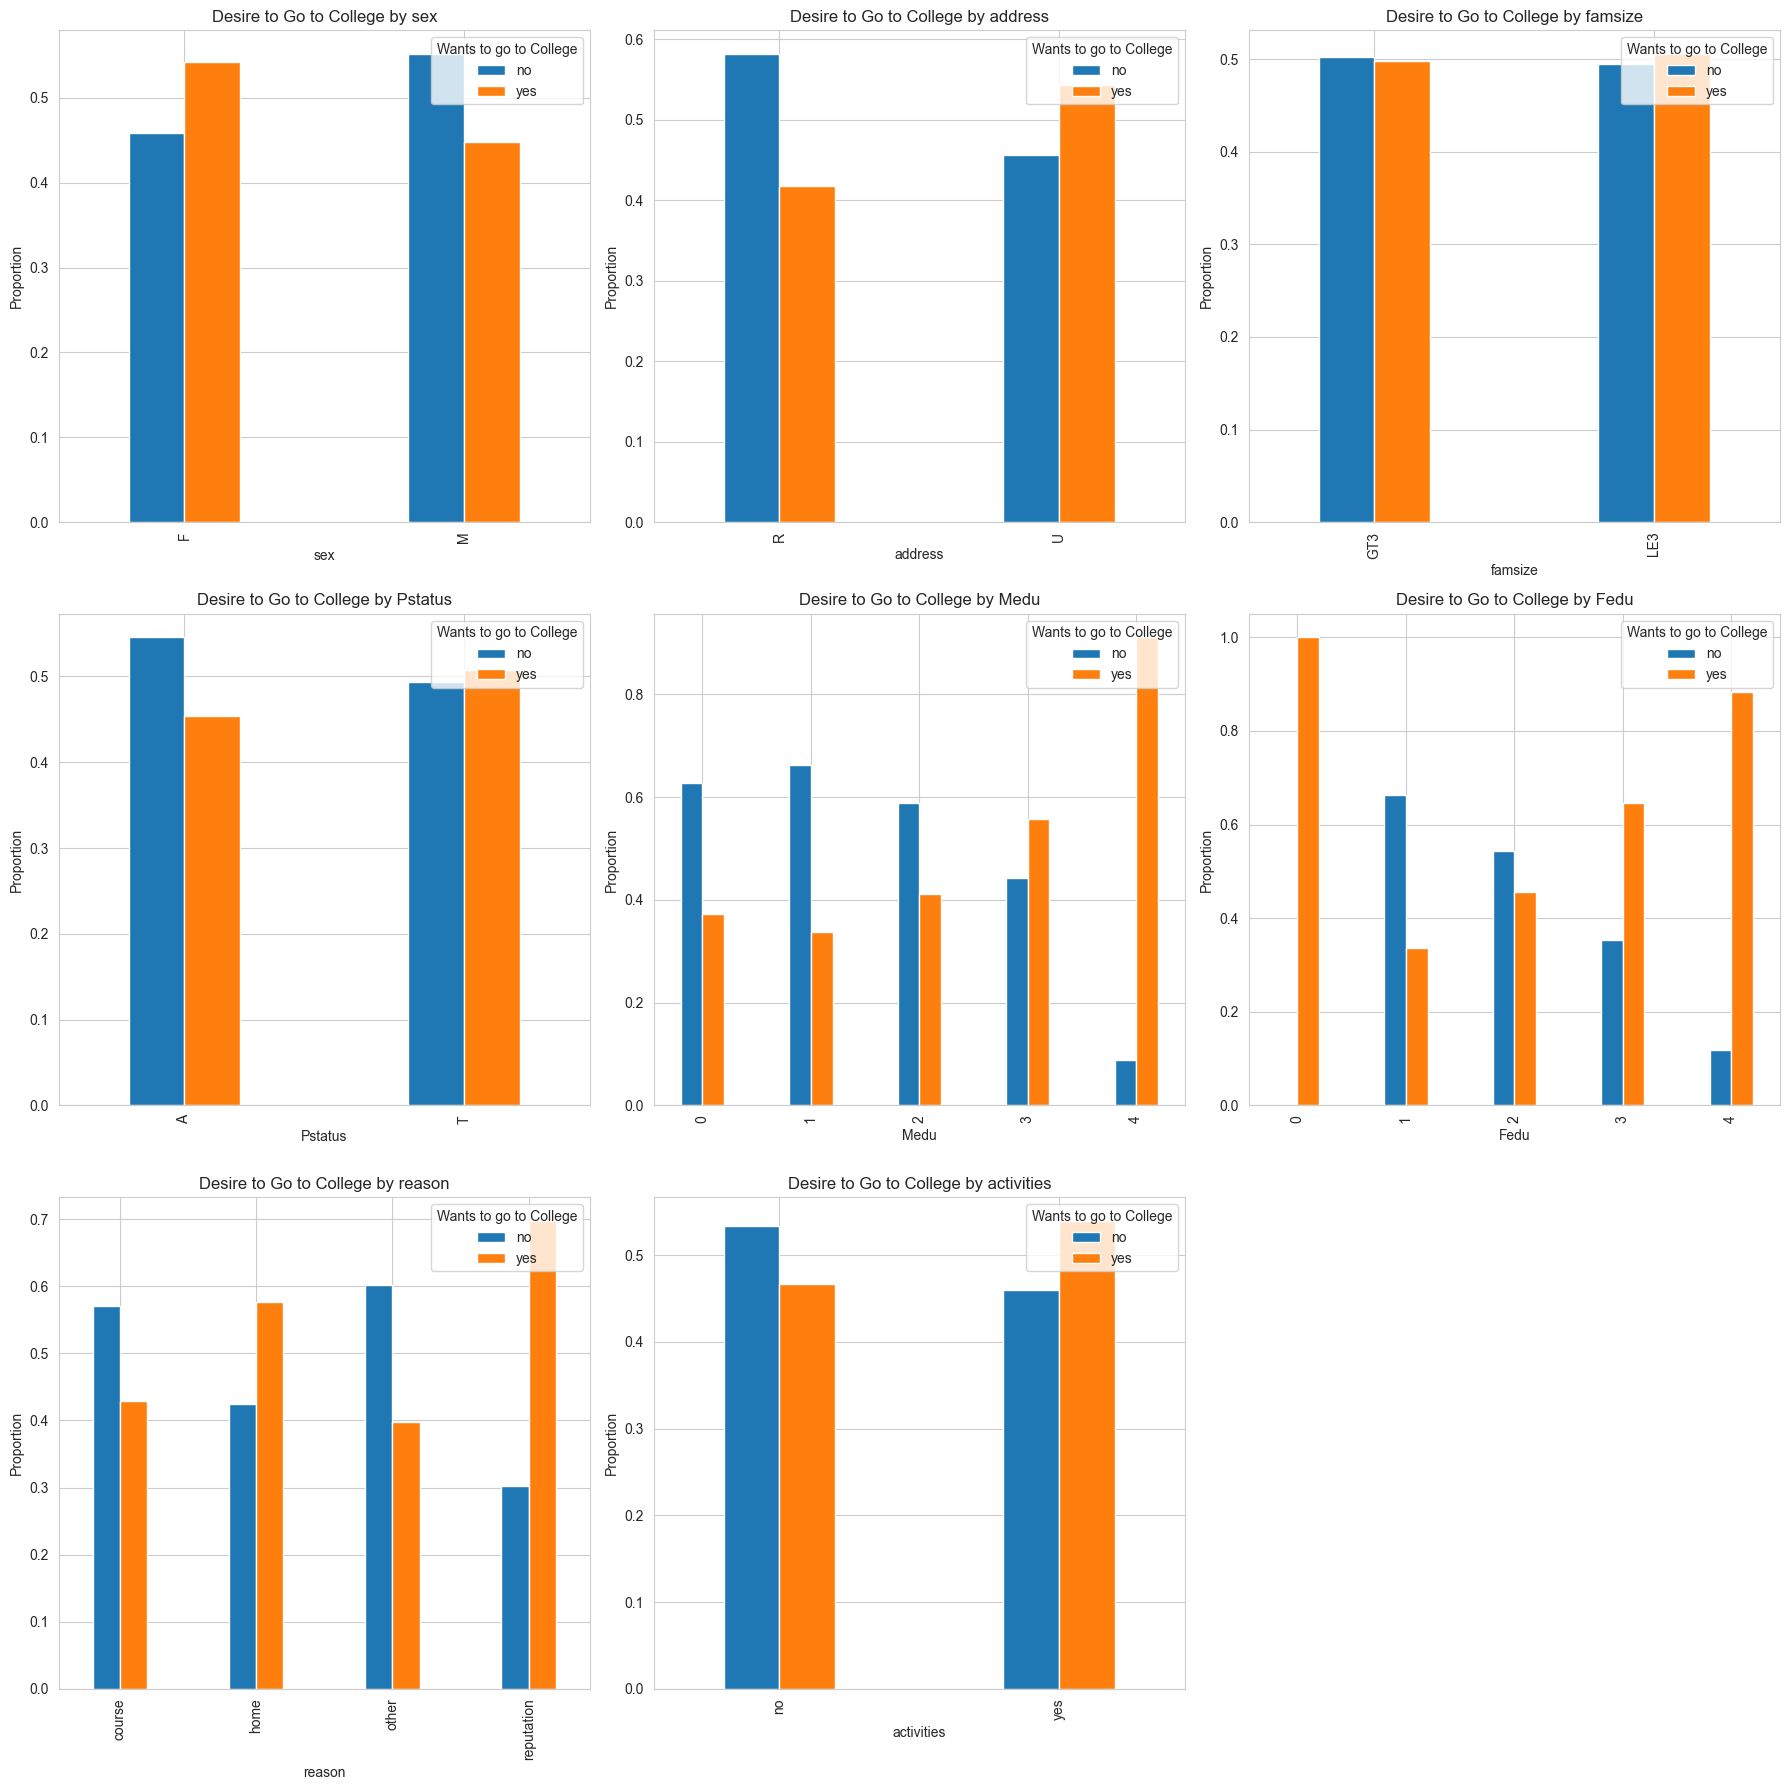

In [58]:
# Set the style of seaborn plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each variable and plot
for i, variable in enumerate(variables_of_interest):
    # Calculate proportions for each category
    total_college_students = len(college_df)
    total_no_college_students = len(no_college_df)
    
    proportions = (df.groupby([variable, 'higher']).size() / df.groupby('higher').size()).unstack()
    proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Normalize proportions
    
    # Plot the proportions
    proportions.plot(kind='bar', stacked=False, ax=axes[i], width=0.4)
    
    axes[i].set_title(f'Desire to Go to College by {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Wants to go to College', loc='upper right')

# Remove any unused subplots
for j in range(len(variables_of_interest), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [61]:
(df['G3'] - df['G1']).describe()

count    649.000000
mean       0.506934
std        1.820756
min      -11.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       11.000000
dtype: float64